## Business Understanding ##


### Introduction
 * An American based Tech Sales company wants to make use of their 2019 sales data ,to find more insights into maximizing the sales.
 

**Objective:**
The goal of this analysis is to help a Tech Sales Company to leverage their 2019 sales data to uncover actionable insights that will drive sales growth, operational efficiency, and strategic decision-making.


**Goal**
- To find opportunities to drive more sales and work more efficiently

### Data Understanding

**Data Source:**
The client has provided acess to their datasets with half of it from the database and other Csv files on Onedrive.These files included columns: Order ID, Quantity Ordered, Price Each, Order Date, and Purchase Address.etc


* **What are these column names about?**

- **Order ID**: A unique identifier assigned to each order placed by a customer.
- **Quantity Ordered**: The number of units of a product purchased in a particular order.
- **Price Each**: The price per unit of the product ordered.
- **Order Date**: The date and time when the order was placed.
- **Purchase Address**: The address where the order was placed or delivered, usually including the customer’s city, state, and zip code.
- **Product**: The specific item or good purchased in the order.
- **Total Revenue**: The total amount generated from each order, typically calculated as `Quantity Ordered * Price Each`.
- **City**: The city where the order was placed or delivered, extracted from the purchase address.
- **Product Level**: A categorization of products based on their price, such as 'High-Level' for more expensive items and 'Basic-Level' for less expensive ones.

These are common fields used in the 2019 sales data analysis 

### Analytical Questions


1. How much revenue did the company generate in 2019? 

2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products? ( Best performing Products & Worst Performing Products)

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do products compare in revenue generated and quantities ordered? 

7. What are the high and basic level products respectively and how do they impact sales

8. What is the total number of repeated customers or commited customers.

### Hypothesis Testing
- Null Hypothesis (H0): Independent variables such as Product Level, City, Quantity Ordered, and Price Each do not significantly affect Total Sales.
- Alternative Hypothesis (H1): Independent variables such as Product Level, City, Quantity Ordered, and Price Each significantly affect Total Sales.

**Data Exploration Objectives:**
- Validate the completeness and consistency of the data.
- Ensure no critical information is missing.
- Understand the patterns in the dataset (e.g., total revenue, trends)

### Data Preparation

### Loading Datasets


In [96]:
import pyodbc
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import datetime as datetime
import glob
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [97]:
# Get the values for the credentials you set in the '.env' file
environment_variables = dotenv_values('.env')

database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
user= environment_variables.get("USER")
password = environment_variables.get("PASSWORD")

In [98]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={user};PWD={password}"

In [99]:
print(connection_string)

DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=capstone;PWD=Z7x@8pM$2w


In [100]:
connection = pyodbc.connect(connection_string)

In [101]:
# Define the SQL query to list all tables (for SQL Server)
query = """
SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE';
"""
 
# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
tables = pd.read_sql(query, connection)

In [102]:
# Connection to each of the table
query1 = "Select * from Sales_July_2019"
query2 = "Select * from Sales_August_2019"
query3 = "Select * from Sales_September_2019"
query4 = "Select * from Sales_October_2019"
query5 = "Select * from Sales_November_2019"
query6 = "Select * from Sales_December_2019"
 
# Execute the SQL query and fetch the result
july_df = pd.read_sql(query1, connection)
august_df = pd.read_sql(query2, connection)
september_df = pd.read_sql(query3, connection)
october_df = pd.read_sql(query4, connection)
november_df = pd.read_sql(query5, connection)
december_df = pd.read_sql(query6, connection)
 
# Define the dictionary with DataFrames
half_2 = {
    'july': july_df,
    'august': august_df,
    'september': september_df,
    'october': october_df,
    'november': november_df,
    'december': december_df
}
 
# Iterate over the dictionary
for month, df in half_2.items():
    print(f'{month}')
    print(df.columns)
    print(df.shape)
    print('=' * 50)
 

july
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(14371, 6)
august
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(12011, 6)
september
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(11686, 6)
october
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(20379, 6)
november
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(17661, 6)
december
Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')
(25117, 6)


In [103]:
# Merge all DataFrames into one
second_half = pd.concat(half_2, ignore_index=True)
second_half.shape
second_half.tail()
 

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
101224,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [104]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB


In [105]:
# Sample function to adjust the year by subtracting 2000
def adjust_year(date_str):
    if pd.isnull(date_str):
        return date_str  # If the date is None/NaT, return it as is
    
    # Convert to string if it's not already
    date_str = str(date_str)
    
    # Split the date and adjust the year
    date_parts = date_str.split('-')
    year = int(date_parts[0])
    adjusted_year = year - 2000
    
    # Return the adjusted date string
    return f"{adjusted_year}-{date_parts[1]}-{date_parts[2]} {date_str[10:]}"

# Apply the function to adjust the year
second_half['Adjusted_Order_Date'] = second_half['Order_Date'].apply(adjust_year)

# Display the result
print(second_half[['Order_Date', 'Adjusted_Order_Date']])


                         Order_Date  \
0       2026-07-19 16:51:00.0000000   
1       2005-07-19 08:55:00.0000000   
2       2029-07-19 12:41:00.0000000   
3       2028-07-19 10:15:00.0000000   
4       2031-07-19 02:13:00.0000000   
...                             ...   
101220  2011-12-19 20:58:00.0000000   
101221  2001-12-19 12:01:00.0000000   
101222  2009-12-19 06:43:00.0000000   
101223  2003-12-19 10:39:00.0000000   
101224  2021-12-19 21:45:00.0000000   

                                Adjusted_Order_Date  
0       26-07-19 16:51:00.0000000  16:51:00.0000000  
1        5-07-19 08:55:00.0000000  08:55:00.0000000  
2       29-07-19 12:41:00.0000000  12:41:00.0000000  
3       28-07-19 10:15:00.0000000  10:15:00.0000000  
4       31-07-19 02:13:00.0000000  02:13:00.0000000  
...                                             ...  
101220  11-12-19 20:58:00.0000000  20:58:00.0000000  
101221   1-12-19 12:01:00.0000000  12:01:00.0000000  
101222   9-12-19 06:43:00.0000000  06:43:00.0

In [106]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Order_ID             100730 non-null  float64
 1   Product              100925 non-null  object 
 2   Quantity_Ordered     100730 non-null  float64
 3   Price_Each           100730 non-null  float64
 4   Order_Date           100730 non-null  object 
 5   Purchase_Address     100925 non-null  object 
 6   Adjusted_Order_Date  100730 non-null  object 
dtypes: float64(3), object(4)
memory usage: 5.4+ MB


In [107]:
# Delete uneccesary column
second_half.drop(columns=['Order_Date'], inplace=True)

In [108]:
# Drop the original 'Order_Date' column and rename 'Adjusted_Order_Date' to 'Order Date'
second_half=second_half.rename(columns={'Adjusted_Order_Date': 'Order Date'})

# Display the updated DataFrame
second_half

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Order Date
0,222910.0,Apple Airpods Headphones,1.0,150.000000,"389 South St, Atlanta, GA 30301",26-07-19 16:51:00.0000000 16:51:00.0000000
1,222911.0,Flatscreen TV,1.0,300.000000,"590 4th St, Seattle, WA 98101",5-07-19 08:55:00.0000000 08:55:00.0000000
2,222912.0,AA Batteries (4-pack),1.0,3.840000,"861 Hill St, Atlanta, GA 30301",29-07-19 12:41:00.0000000 12:41:00.0000000
3,222913.0,AA Batteries (4-pack),1.0,3.840000,"190 Ridge St, Atlanta, GA 30301",28-07-19 10:15:00.0000000 10:15:00.0000000
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,"824 Forest St, Seattle, WA 98101",31-07-19 02:13:00.0000000 02:13:00.0000000
...,...,...,...,...,...,...
101220,319666.0,Lightning Charging Cable,1.0,14.950000,"14 Madison St, San Francisco, CA 94016",11-12-19 20:58:00.0000000 20:58:00.0000000
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,"549 Willow St, Los Angeles, CA 90001",1-12-19 12:01:00.0000000 12:01:00.0000000
101222,319668.0,Vareebadd Phone,1.0,400.000000,"273 Wilson St, Seattle, WA 98101",9-12-19 06:43:00.0000000 06:43:00.0000000
101223,319669.0,Wired Headphones,1.0,11.990000,"778 River St, Dallas, TX 75001",3-12-19 10:39:00.0000000 10:39:00.0000000


In [109]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Purchase_Address  100925 non-null  object 
 5   Order Date        100730 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB


In [110]:
 # Define the folder path
folder_path = r'C:\Users\Josephine\Desktop\Career Accelerator\Capstone-Project-Sales-Analysis\Datasets'
 
# Get a list of all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
 
# Load all CSV files and concatenate them into a single DataFrame
first_half = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
 
first_half.shape
 

(85625, 6)

In [111]:
first_half.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [112]:
first_half.tail(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85610,209907,Lightning Charging Cable,1,14.95,05/20/19 10:18,"228 Spruce St, Dallas, TX 75001"
85611,209908,Wired Headphones,1,11.99,05/28/19 11:58,"817 1st St, Boston, MA 02215"
85612,NaN,NaN,NaN,NaN,NaN,NaN
85613,209909,USB-C Charging Cable,1,11.95,05/13/19 13:50,"438 12th St, Atlanta, GA 30301"
85614,209910,Lightning Charging Cable,1,14.95,05/09/19 08:37,"633 Jefferson St, Atlanta, GA 30301"
85615,209911,Wired Headphones,1,11.99,05/13/19 19:46,"939 13th St, New York City, NY 10001"
85616,209912,20in Monitor,1,109.99,05/01/19 15:30,"482 Washington St, San Francisco, CA 94016"
85617,209913,AAA Batteries (4-pack),1,2.99,05/11/19 11:51,"372 Park St, Los Angeles, CA 90001"
85618,209914,ThinkPad Laptop,1,999.99,05/02/19 19:57,"903 Adams St, Portland, OR 97035"
85619,209915,Apple Airpods Headphones,1,150,05/01/19 18:05,"231 5th St, Portland, OR 97035"


### Merging Datasets

In [113]:
# Changing Column names to fit as one and then concat
second_half.rename(columns={'Order_ID': 'Order ID'}, inplace=True)
second_half.rename(columns={'Quantity_Ordered': 'Quantity Ordered'}, inplace=True)
second_half.rename(columns={'Price_Each': 'Price Each'}, inplace=True)
second_half.rename(columns={'Purchase_Address': 'Purchase Address'}, inplace=True)

second_half.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order Date
0,222910.0,Apple Airpods Headphones,1.0,150.000000,"389 South St, Atlanta, GA 30301",26-07-19 16:51:00.0000000 16:51:00.0000000
1,222911.0,Flatscreen TV,1.0,300.000000,"590 4th St, Seattle, WA 98101",5-07-19 08:55:00.0000000 08:55:00.0000000
2,222912.0,AA Batteries (4-pack),1.0,3.840000,"861 Hill St, Atlanta, GA 30301",29-07-19 12:41:00.0000000 12:41:00.0000000
3,222913.0,AA Batteries (4-pack),1.0,3.840000,"190 Ridge St, Atlanta, GA 30301",28-07-19 10:15:00.0000000 10:15:00.0000000
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,"824 Forest St, Seattle, WA 98101",31-07-19 02:13:00.0000000 02:13:00.0000000
...,...,...,...,...,...,...
101220,319666.0,Lightning Charging Cable,1.0,14.950000,"14 Madison St, San Francisco, CA 94016",11-12-19 20:58:00.0000000 20:58:00.0000000
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,"549 Willow St, Los Angeles, CA 90001",1-12-19 12:01:00.0000000 12:01:00.0000000
101222,319668.0,Vareebadd Phone,1.0,400.000000,"273 Wilson St, Seattle, WA 98101",9-12-19 06:43:00.0000000 06:43:00.0000000
101223,319669.0,Wired Headphones,1.0,11.990000,"778 River St, Dallas, TX 75001",3-12-19 10:39:00.0000000 10:39:00.0000000


In [114]:
# Merging both halfs into 2019_df
Merged_df = pd.concat([first_half, second_half], axis=0, ignore_index='True')
 
print('1st half year data:', first_half.shape[0])
print('2st half year data:', second_half.shape[0])
print('Total year 2019 data:', Merged_df.shape[0])
 
Merged_df.head()

1st half year data: 85625
2st half year data: 101225
Total year 2019 data: 186850


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [115]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186110 non-null  object
 3   Price Each        186110 non-null  object
 4   Order Date        186110 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning and Transformation
* Check and handle duplicates and missing values
* Convert columns too the right datatype(s)
* Add A few important columns, i.e extract year column,time and city names


In [116]:
# Checking for duplictes and misssing values
Merged_df.isna().sum()


Order ID            740
Product             545
Quantity Ordered    740
Price Each          740
Order Date          740
Purchase Address    545
dtype: int64

In [117]:
# Finding Duplicate values
# Check for duplicate rows in the dataframe
duplicate_rows = Merged_df[Merged_df.duplicated()]
duplicate_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185481,NaN,Product,NaN,NaN,None,Purchase Address
185729,NaN,None,NaN,NaN,None,None
185925,NaN,Product,NaN,NaN,None,Purchase Address
185955,NaN,Product,NaN,NaN,None,Purchase Address


In [118]:
# Checking for total number of duplicates
Merged_df.duplicated().sum()

1161

In [119]:
# Drop duplicated values
Merged_df1=Merged_df.drop_duplicates(keep='first')


In [120]:
# Display the shape of the dataframe before and after dropping duplicates
print(f"Shape before dropping duplicates: {Merged_df.shape}")
print(f"Shape after dropping duplicates: {Merged_df1.shape}")

Shape before dropping duplicates: (186850, 6)
Shape after dropping duplicates: (185689, 6)


In [121]:
# Checking new status of null values
Merged_df1.isna().sum()

Order ID            2
Product             1
Quantity Ordered    2
Price Each          2
Order Date          2
Purchase Address    1
dtype: int64

In [122]:
# Drop rows with null values from Merged_df1
Merged_df1_cleaned = Merged_df1.dropna()

# Display the shape of the dataframe before and after dropping null values
print(f"Shape before dropping null values: {Merged_df1.shape}")
print(f"Shape after dropping null values: {Merged_df1_cleaned.shape}")

Shape before dropping null values: (185689, 6)
Shape after dropping null values: (185687, 6)


In [123]:
# View Cleaned data 
Merged_df1_cleaned.head(20).reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [124]:
Merged_df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [125]:
Merged_df1_cleaned['Order Date'] = pd.to_datetime(Merged_df1_cleaned['Order Date'], errors='coerce')


In [126]:
# Check for rows with NaT in 'Order Date'
invalid_dates = Merged_df1_cleaned[Merged_df1_cleaned['Order Date'].isna()]

# Drop rows with NaT in 'Order Date' if necessary
Merged_df1_cleaned.dropna(subset=['Order Date'], inplace=True)


In [127]:
# Extract the year from 'Order date'
Merged_df1_cleaned['Year'] = Merged_df1_cleaned["Order Date"].dt.year

In [128]:
Merged_df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  object        
 3   Price Each        185686 non-null  object        
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Year              185686 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 10.6+ MB


In [129]:
# Split time into a new column
Merged_df1_cleaned['Order Time'] = Merged_df1_cleaned['Order Date'].dt.time

# Create a new column for the month (in numeric format)
Merged_df1_cleaned['Order Month'] = Merged_df1_cleaned['Order Date'].dt.month

# Sort the dataframe by the new 'Order Month' column in ascending order
Merged_df1_cleaned = Merged_df1_cleaned.sort_values(by='Order Month').reset_index(drop=True)

# Display the first few rows to verify the changes
print(Merged_df1_cleaned[['Order Date', 'Order Time', 'Order Month']].head())


           Order Date Order Time  Order Month
0 2019-01-12 08:44:00   08:44:00            1
1 2019-01-20 11:39:00   11:39:00            1
2 2019-01-11 17:37:00   17:37:00            1
3 2019-01-11 08:11:00   08:11:00            1
4 2019-01-03 20:43:00   20:43:00            1


In [130]:
# Extracting the city names
# Split the 'Purchase Address' by commas and extract the city (second element)
Merged_df1_cleaned['City'] = Merged_df1_cleaned['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
Merged_df1_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Order Time,Order Month,City
0,319596.0,Lightning Charging Cable,1.0,14.95,2019-01-12 08:44:00,"436 14th St, New York City, NY 10001",2019,08:44:00,1,New York City
1,144314,Lightning Charging Cable,1,14.95,2019-01-20 11:39:00,"88 Ridge St, Seattle, WA 98101",2019,11:39:00,1,Seattle
2,293505.0,Lightning Charging Cable,1.0,14.95,2019-01-11 17:37:00,"510 North St, New York City, NY 10001",2019,17:37:00,1,New York City
3,144313,27in 4K Gaming Monitor,1,389.99,2019-01-11 08:11:00,"918 Madison St, San Francisco, CA 94016",2019,08:11:00,1,San Francisco
4,144312,27in FHD Monitor,1,149.99,2019-01-03 20:43:00,"563 Wilson St, Los Angeles, CA 90001",2019,20:43:00,1,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
185681,227016.0,Apple Airpods Headphones,1.0,150.0,2019-12-07 15:13:00,"577 2nd St, Seattle, WA 98101",2019,15:13:00,12,Seattle
185682,304618.0,AA Batteries (4-pack),1.0,3.84,2019-12-17 08:27:00,"420 Sunset St, Los Angeles, CA 90001",2019,08:27:00,12,Los Angeles
185683,304617.0,27in 4K Gaming Monitor,1.0,389.98999,2019-12-12 21:08:00,"731 4th St, Los Angeles, CA 90001",2019,21:08:00,12,Los Angeles
185684,304613.0,Lightning Charging Cable,1.0,14.95,2019-12-14 10:13:00,"585 Elm St, New York City, NY 10001",2019,10:13:00,12,New York City


In [131]:
# Save the updated DataFrame to a CSV file with the name 'merged_2019.csv'
Merged_df1_cleaned.to_csv('merged_2019.csv', index=False)

print("CSV file 'merged_2019.csv' has been created successfully.")


CSV file 'merged_2019.csv' has been created successfully.


### Exploratory Data Analysis
* Data Overview or statistics
* Finding relationships, i.e Univariate,bivariate and multivarite analysis

In [132]:
Merged_df1_cleaned.describe(include= "object").T

,count,unique,top,freq
Order ID,185686,178437,160873,5
Product,185686,19,USB-C Charging Cable,21859
Quantity Ordered,185686.0,17.0,1.0,91193.0
Price Each,185686.0,39.0,11.95,11928.0
Purchase Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9
Order Time,185686,1440,11:58:00,251
City,185686,9,San Francisco,44662


* Insights
- **Total Orders**: 185,686 with 178,437 unique Order IDs.
- **Top Product**: "USB-C Charging Cable" sold 21,859 times.
- **Most Common Quantity Ordered**: 1, with 91,193 occurrences.
- **Top City for Sales**: San Francisco with 44,662 orders.
- **Most Frequent Purchase Address**: "193 Forest St, San Francisco, CA 94016" with 9 occurrences.

#### Univariate Analysis
- For a univariate analysis on sales, we focus on analyzing individual variables related to sales, such as Quantity Ordered, Price Each, or Total Sales. In this case, we can create a new column for Total Sales (Revenue) and perform the analysis. 

In [133]:
Merged_df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  object        
 3   Price Each        185686 non-null  object        
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Year              185686 non-null  int32         
 7   Order Time        185686 non-null  object        
 8   Order Month       185686 non-null  int32         
 9   City              185686 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 12.8+ MB


In [135]:
# Order ID, Quantity Ordered,Price Each should be converted to numeric
# Convert 'Quantity Ordered' and 'Price Each' to numeric, forcing errors to NaN
Merged_df1_cleaned['Quantity Ordered'] = pd.to_numeric(Merged_df1_cleaned['Quantity Ordered'], errors='coerce')
Merged_df1_cleaned['Price Each'] = pd.to_numeric(Merged_df1_cleaned['Price Each'], errors='coerce')
Merged_df1_cleaned['Order ID'] = pd.to_numeric(Merged_df1_cleaned['Order ID'], errors='coerce')

In [136]:
# Step 1: Calculate Total Sales
Merged_df1_cleaned['Total Sales'] = Merged_df1_cleaned['Quantity Ordered'] * Merged_df1_cleaned['Price Each']

# Step 2: Summary Statistics
sales_summary = Merged_df1_cleaned['Total Sales'].describe()
sales_summary

count    185686.000000
mean        185.611935
std         333.032117
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Total Sales, dtype: float64

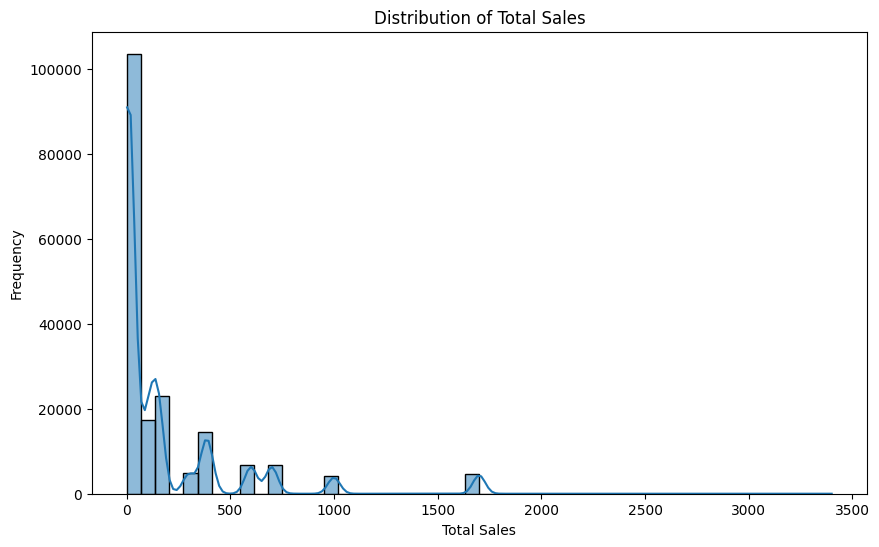

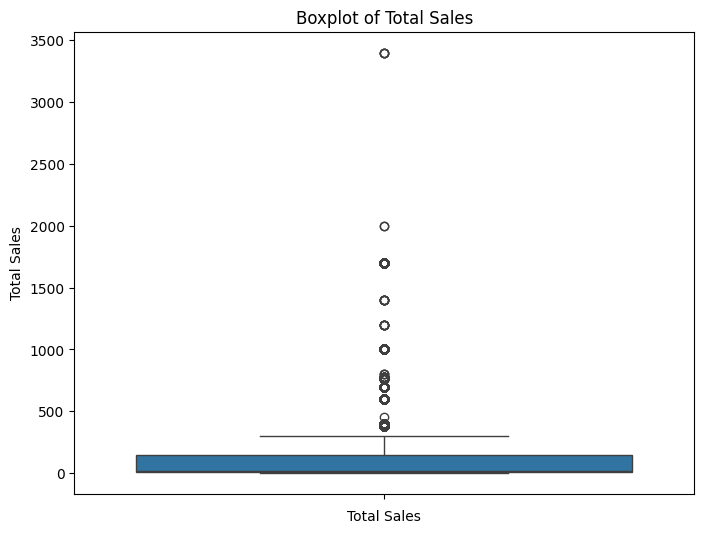

In [137]:
# Step 3: Visualizations
# Histogram for Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(Merged_df1_cleaned['Total Sales'], bins=50, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Total Sales
plt.figure(figsize=(8, 6))
sns.boxplot(Merged_df1_cleaned['Total Sales'])
plt.title('Boxplot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

Outliers:

There are many outliers, indicated by the circles above the whiskers. These outliers represent transactions with significantly higher sales than the majority of the data.
A few extreme outliers go beyond 3000, indicating some very high sales transactions.
Skewness:

The graph suggests that the data is positively skewed, meaning that most sales are lower, with a few very high-value sales pulling the distribution upwards.
Range:

The range of sales varies significantly, with some transactions being extremely low and others reaching above 3000.
Impact on Analysis:

The presence of many outliers suggests that a small portion of transactions contributes disproportionately to total sales.
The positive skew means that strategies might be needed to increase the frequency of higher-value sales while understanding why most transactions tend to be low.

### Bivariate Analysis

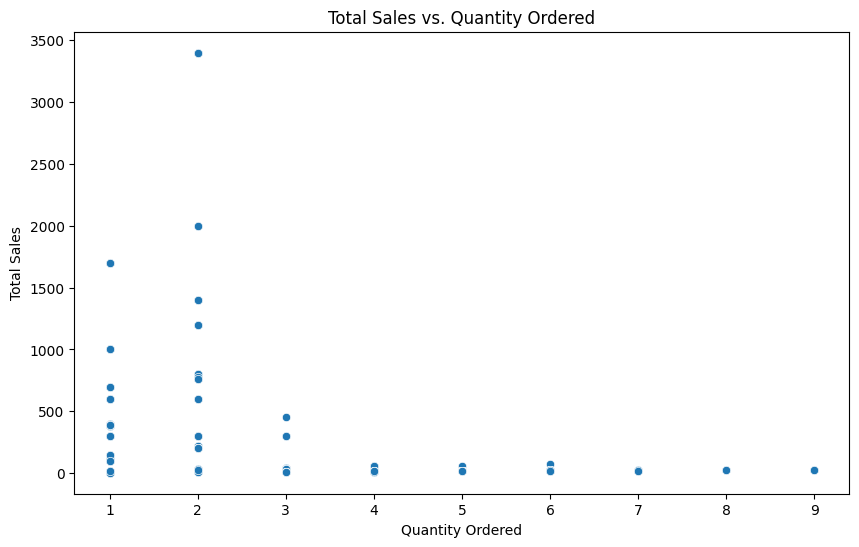

In [138]:
# Bivariate Analysis
# 1. Total Sales vs. Quantity Ordered
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Ordered', y='Total Sales', data=Merged_df1_cleaned)
plt.title('Total Sales vs. Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Sales')
plt.show()


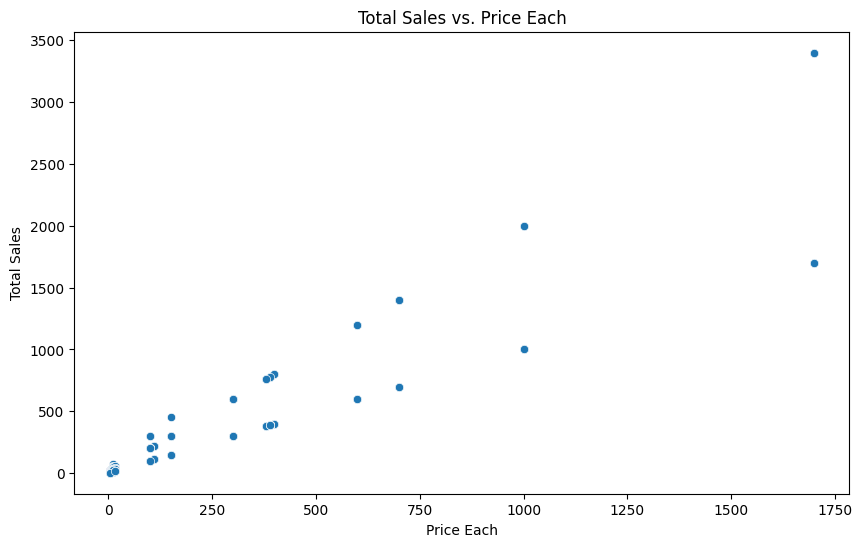

In [139]:
# 2. Total Sales vs. Price Each
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Each', y='Total Sales', data=Merged_df1_cleaned)
plt.title('Total Sales vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Total Sales')
plt.show()

### Insights on the Scatter Plot Matrix:

- **`Quantity Ordered` vs. `Price Each`**:
  - Shows a general trend of lower prices being associated with higher quantities ordered, indicating that bulk orders are usually for lower-priced items.

- **`Quantity Ordered` vs. `Total Sales`**:
  - The scatter suggests that higher quantities ordered do not necessarily lead to higher total sales. This implies that the impact of quantity on sales is moderated by the price of the items.

- **`Price Each` vs. `Total Sales`**:
  - A positive correlation is visible, with higher prices leading to higher total sales, which aligns with the calculation of total sales being directly dependent on the price per item.

- **Distribution**:
  - Points are scattered, showing variability in the relationships. There are no strong outliers, and the general patterns align with expected business logic.

In summary, the scatter plot matrix indicates relationships where higher quantities ordered are linked with lower prices and that total sales are positively correlated with price but not strongly with quantity alone.

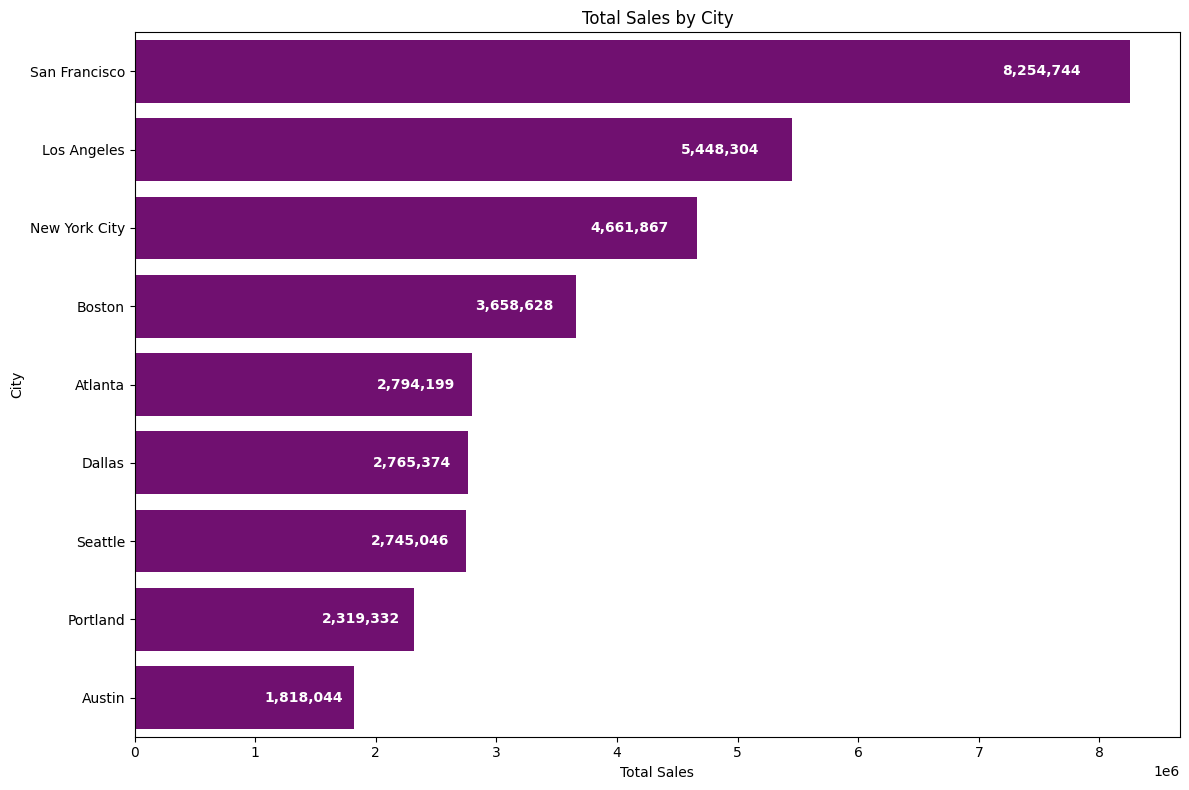

In [140]:
# Aggregate Total Sales by City
city_sales = Merged_df1_cleaned.groupby('City')['Total Sales'].sum().reset_index()

# Transposed Bar Plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Total Sales', y='City', data=city_sales.sort_values(by='Total Sales', ascending=False), palette=['purple'])

# Add labels inside each bar
for index, (value, city) in enumerate(zip(city_sales.sort_values(by='Total Sales', ascending=False)['Total Sales'], city_sales.sort_values(by='Total Sales', ascending=False)['City'])):
    bar_plot.text(value - (value * 0.05), index, f'{value:,.0f}', va='center', ha='right', color='white', fontsize=10, fontweight='bold')


plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()


* Insights
- Sales Distribution In Cities: The graph shows how total sales are distributed across different cities, with each city’s bar length representing its total 
- **'San Francisco',Los Angeles and New York City'** are seen to have generate high sales revenue for the company
- **Portland and Austin**  generate relatively low sales for the company
- More marketing should be done in areas with low sales revenue as well as other investigations as to why the low sales. Well performing states should also have more focus to meet up the demand of product supplies.

### Multivariate Analysis

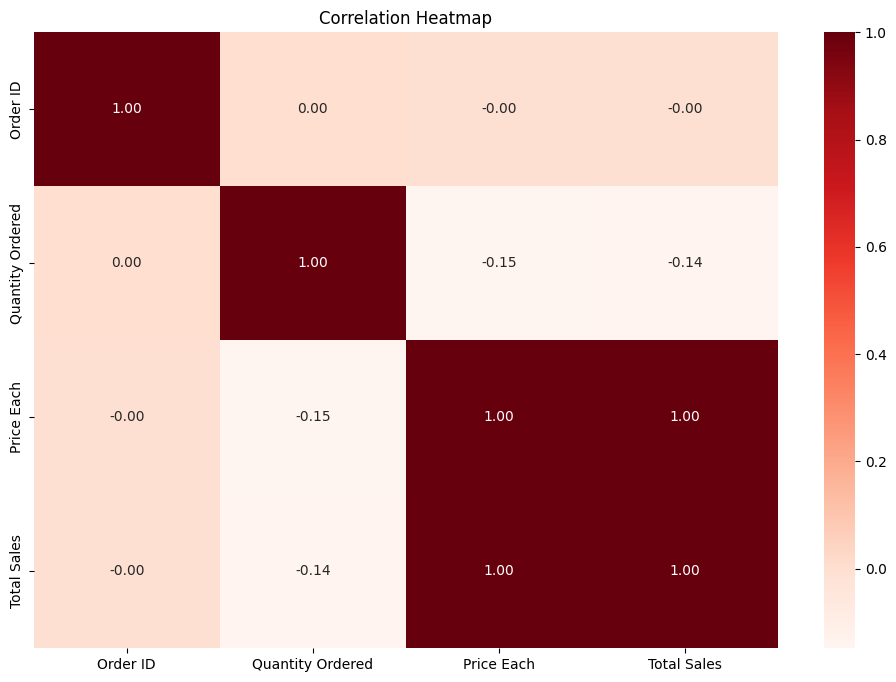

In [141]:
# Generate the correlation matrix, excluding non-numeric columns
corr_matrix = Merged_df1_cleaned.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

* **Inference**
- Perfect correlation between Price Each and Total Sales (1.00): This is expected since the Total Sales is directly calculated using Price Each, implying a perfect linear relationship.

- No significant correlation between Order ID and other variables: Order ID has a correlation of close to 0 with all the other variables, suggesting that it is a unique identifier with no influence on Quantity Ordered, Price Each, or Total Sales.

- Weak negative correlation between Quantity Ordered  and Total Sales (-0.14): This suggests that ordering larger quantities doesn't significantly drive up the total sales, likely due to lower prices for bulk purchases.

**Conclusion**
- The graph confirms expected relationships like the strong link between Price Each and Total Sales, while showing minimal to weak relationships between other variables.


### Answering Analytical Questions
* Key Metrics, [Total Revenue,Total Number of orders,etc]

In [142]:
# Calculate Total Revenue for 2019
Total_Revenue = round((Merged_df1_cleaned['Quantity Ordered'] * Merged_df1_cleaned['Price Each']).sum(),2)
# Convert the total revenue to millions
Total_Revenue_in_millions = round(Total_Revenue / 1_000_000, 2)

# Display Total Revenue in dollars
(f"Total Revenue for 2019: ${Total_Revenue_in_millions} million")

'Total Revenue for 2019: $34.47 million'

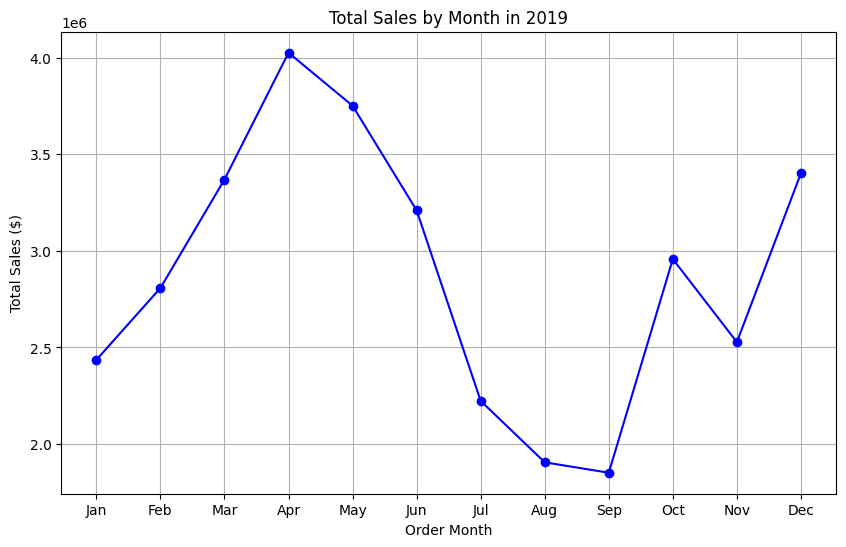

In [143]:
# Q2.What are the seasonalities are the data?
# Calculate total sales by month
Merged_df1_cleaned['Total Sales'] = Merged_df1_cleaned['Quantity Ordered'] * Merged_df1_cleaned['Price Each']
monthly_sales = Merged_df1_cleaned.groupby('Order Month')['Total Sales'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Month'], monthly_sales['Total Sales'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Total Sales by Month in 2019')
plt.xlabel('Order Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.grid(True)
plt.show()


* **Insights**
* Total Sales by Month in 2019

1. **Seasonal Peaks:**
   - The highest sales occurred in **April**, with sales reaching approximately $4 million.
   - There is a noticeable spike again in **September** and **December**, with sales recovering after a dip in mid-year.

2. **Sales Decline Mid-Year:**
   - From **May to August**, there is a steady decline in total sales, with **August** being the lowest point of the year.
   - This suggests a slower sales period during the summer months.

3. **Sales Recovery:**
   - After hitting the lowest point in **August**, sales start to recover, especially in **September**, indicating possible promotional activities or increased demand in the fall season.

4. **Holiday Impact:**
   - The sharp rise in sales in **December** is likely due to holiday shopping, which is typical for many retail industries.

5. **Steady Growth in Early Months:**
   - Sales gradually increase from **January** to **April**, with consistent growth observed throughout the early part of the year.

* **Conclusion:**
The Graph shows a clear **seasonal trend** in sales, with significant peaks in **April**, **September**, and **December**. The mid-year slump, especially in **August**, may point to a typical slow season for the business, while the end-of-year spike is likely driven by holiday demand.

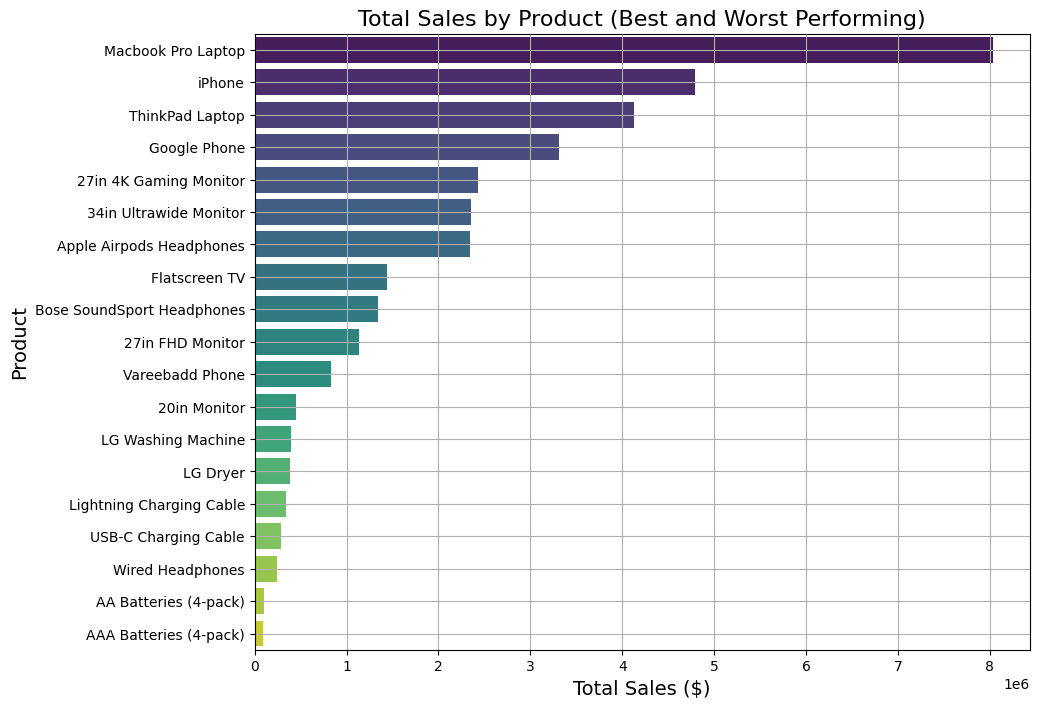

In [144]:
# Q3. what are the best and worst performing products?
# Step 1: Aggregate Total Sales by Product
product_sales = Merged_df1_cleaned.groupby('Product')['Total Sales'].sum().reset_index()

# Step 2: Sort Products by Total Sales
product_sales_sorted = product_sales.sort_values(by='Total Sales', ascending=False)

# Step 3: Create a Horizontal Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Sales', y='Product', data=product_sales_sorted, palette='viridis')

# Step 4: Customize the plot
plt.title('Total Sales by Product (Best and Worst Performing)', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


* **Insights**
**Our best Performing Products has been**;
The Macbook Pro Laptop,Iphone, Thinkpad laptop,Google phone
* **Worst performing Products has been**;
AAA Baterries(4-pack),AA Baterries(4-pack),Wired Phones, USB-C Charging Cables

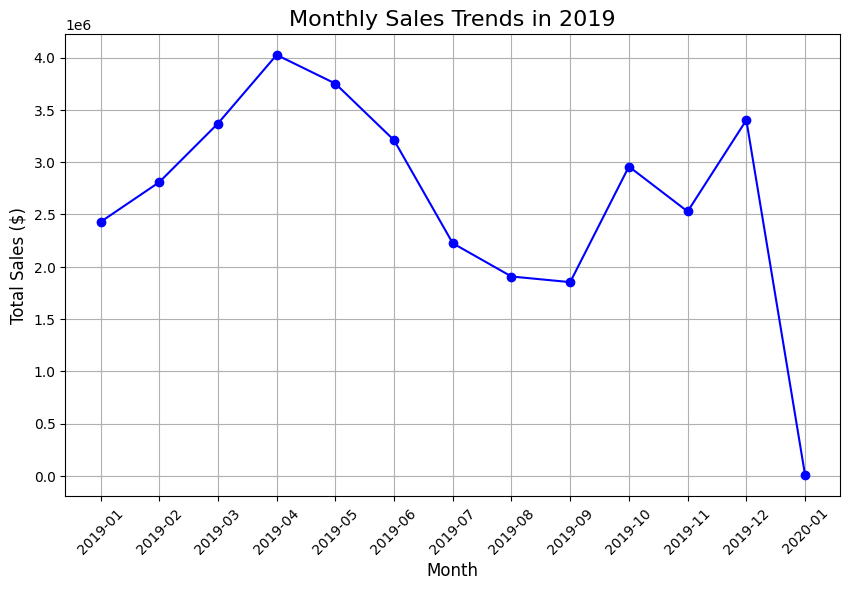

In [145]:
# Q4.What are the sale trends over the months/weeks?
# Step 1: Aggregate Total Sales by Month
Merged_df1_cleaned['Order Month'] = Merged_df1_cleaned['Order Date'].dt.to_period('M')  # Convert to month periods
monthly_sales = Merged_df1_cleaned.groupby('Order Month')['Total Sales'].sum().reset_index()

# Step 2: Create a Line Plot for Sales Trends Over the Months
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Order Month'].astype(str), monthly_sales['Total Sales'], marker='o', color='b')

# Step 3: Customize the plot
plt.title('Monthly Sales Trends in 2019', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.grid(True)

# Show the plot
plt.show()


### Analysis of the Monthly Sales Trends in 2019:

1. **Sales Peak**: 
   - The highest sales occurred in **April 2019**, with sales reaching nearly $4 million. This suggests that this month saw either a major promotion or significant demand for the company's products.

2. **Steady Decline**:
   - Following April, there was a steady decline in sales, reaching a low point in **August 2019**, which had the lowest sales of around $2 million. This indicates a potential off-peak period or a seasonal dip in consumer spending.

3. **Late Year Surge**:
   - From **September onwards**, there was a recovery in sales, with notable peaks in **October** and **December**, likely due to increased spending during the holiday season.

4. **January Drop-off**:
   - Sales dropped to zero in **January 2020**, which could suggest either incomplete data for that month or that the company's fiscal year ended in December 2019.

This graph highlights clear seasonality, with a peak in mid-year followed by a dip and a subsequent rise towards the year's end, which is typical for many businesses with strong holiday sales.

In [146]:
# Q5. What are our most delivered cities?
city_deliveries = Merged_df1_cleaned.groupby('City')['Order ID'].count().reset_index()
# Sort the cities by the number of deliveries
city_deliveries = city_deliveries.sort_values(by='Order ID', ascending=False)
city_deliveries

,City,Order ID
7,San Francisco,44662
4,Los Angeles,29564
5,New York City,24847
2,Boston,19901
0,Atlanta,14863
3,Dallas,14797
8,Seattle,14713
6,Portland,12449
1,Austin,9890


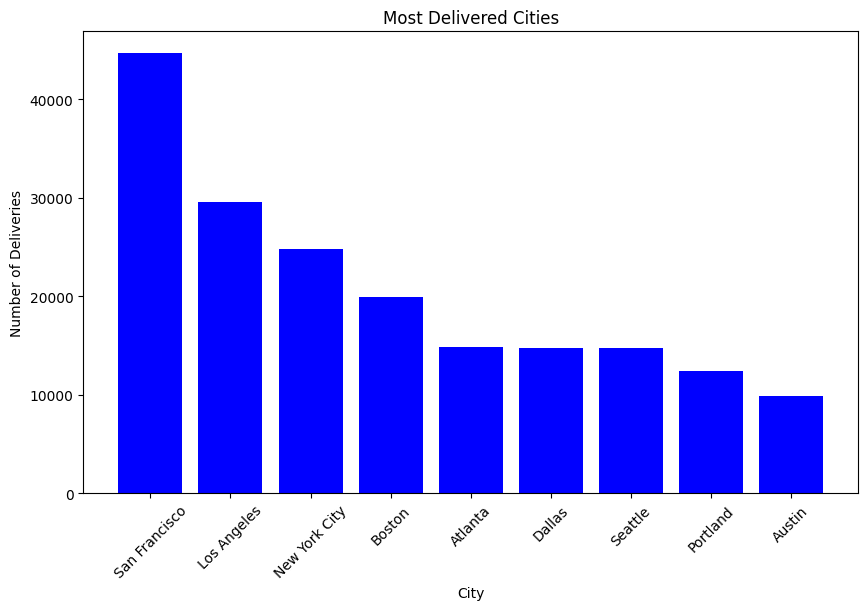

In [148]:
# Q5. What are our most delivered cities?
# Rename columns for clarity
city_deliveries.columns = ['City', 'Number of Deliveries']

# Plot the most delivered cities
plt.figure(figsize=(10,6))
plt.bar(city_deliveries['City'], city_deliveries['Number of Deliveries'], color='blue')
plt.xlabel('City')
plt.ylabel('Number of Deliveries')
plt.title('Most Delivered Cities')
plt.xticks(rotation=45)
plt.show()


* **Insights**
>> San Fransisco , Los Angeles, New York City are most revenue yielding cities

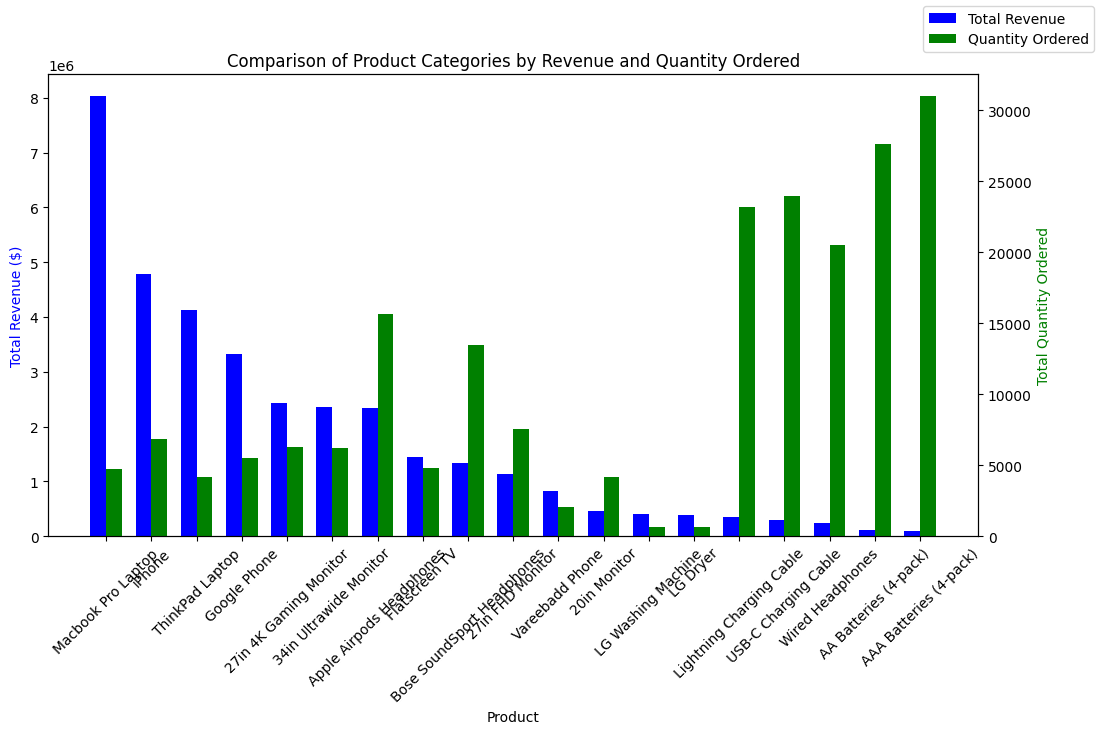

In [149]:
# Q6.How do product categories compare in revenue generated and quantities ordered? 

# Create a new column for Total Revenue
Merged_df1_cleaned['Total Revenue'] = Merged_df1_cleaned['Quantity Ordered'] * Merged_df1_cleaned['Price Each']

# Group by 'Product Category' and calculate total revenue and total quantity ordered
category_performance = Merged_df1_cleaned.groupby('Product').agg({
    'Total Revenue': 'sum', 
    'Quantity Ordered': 'sum'
}).reset_index()

# Sort the results for better visualization
category_performance = category_performance.sort_values(by='Total Revenue', ascending=False)

# Plotting side-by-side bar chart
fig, ax1 = plt.subplots(figsize=(12,6))
bar_width = 0.35
index = np.arange(len(category_performance))

# Plotting Total Revenue
bar1 = ax1.bar(index, category_performance['Total Revenue'], bar_width, label='Total Revenue', color='b')

# Create another axis for Quantity Ordered
ax2 = ax1.twinx()

# Plotting Quantity Ordered
bar2 = ax2.bar(index + bar_width, category_performance['Quantity Ordered'], bar_width, label='Quantity Ordered', color='g')

# Labels and titles
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Revenue ($)', color='b')
ax2.set_ylabel('Total Quantity Ordered', color='g')
ax1.set_title('Comparison of Product Categories by Revenue and Quantity Ordered')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(category_performance['Product'], rotation=45)

# Adding the legend
fig.legend(loc="upper right")

plt.show()


### Insights

1. **MacBook Pro Laptop** stands out as the highest revenue generator, despite not having the highest quantity ordered. This indicates it has a higher price per unit compared to other products.
   
2. **iPhone** and **ThinkPad Laptop** follow in terms of revenue, also showing moderate quantity ordered. These products likely contribute significantly to overall sales, with a good balance of unit sales and pricing.

3. Products like **AA Batteries (4-Pack)**, **AAA Batteries (4-Pack)**, and **Lightning Charging Cable** show very high quantities ordered but relatively low revenue. This suggests these are lower-cost, high-volume items.

4. Products like **LG Washing Machine** and **Bose SoundSport Headphones** show relatively balanced performance, with noticeable quantities ordered and decent revenue.

5. Some products such as **27in 4K Gaming Monitor** and **34in Ultrawide Monitor** generate decent revenue with fewer units sold, indicating their higher price point but lower demand.

### Conclusion:
- Higher-priced electronics like laptops and phones dominate revenue, while low-cost accessories like batteries and charging cables lead in quantity sold.
- There is a clear differentiation between high-revenue, low-volume items and low-revenue, high-volume items.

In [153]:
# Q7. What are the high and basic level products respectively and how do they impact sales
# Add a new column 'Product Level' to categorize products as 'High-Level' or 'Basic-Level'
Merged_df1_cleaned['Product Level'] = np.where(Merged_df1_cleaned['Price Each'] > 99.99, 'High-Level', 'Basic-Level')
# Calculate the total sales for each product level
product_level_sales = Merged_df1_cleaned.groupby('Product Level')['Total Revenue'].sum().reset_index()
# Calculate the total quantity ordered for each product level
product_level_quantity = Merged_df1_cleaned.groupby('Product Level')['Quantity Ordered'].sum().reset_index()

# Merge the two dataframes
product_level_performance = pd.merge(product_level_sales, product_level_quantity, on='Product Level')

# Display the product level performance
product_level_performance

,Product Level,Total Revenue,Quantity Ordered
0,Basic-Level,2.419990e+06,139655.0
1,High-Level,3.204555e+07,69157.0


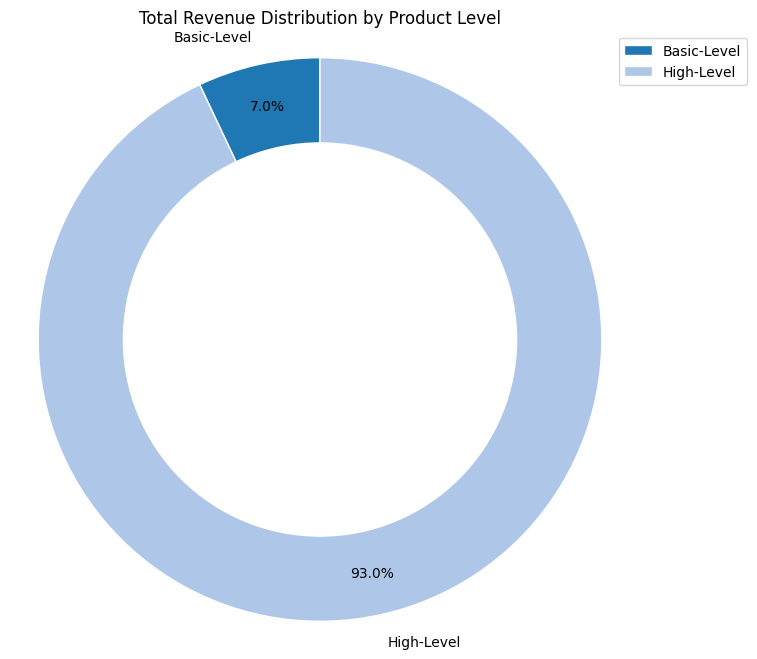

In [158]:
# Data for product level performance
labels = product_level_performance['Product Level']
revenue = product_level_performance['Total Revenue']


fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#1f77b4', '#aec7e8']
ax.pie(revenue, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'}, pctdistance=0.85)

# Add a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Total Revenue Distribution by Product Level')
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

### Q8.What is the total number of repeated customers or commited customers. 
- In the abscence of Customer ID our quest to finding commited customers to boost sales may not be achieved. More info on customer ID in laer analysis would help speak to the customer retention aspect of the company


### **Recommendations to maximizing Product Sales**
Our recommended strategies are enlisted below:
- High volume and low revenue products

### 1. **Increase Pricing Strategically:**
   - **Value-Added Bundling**: Offer bundled deals where low-revenue items are packaged with higher-priced items. This can justify a price increase and enhance perceived value.
   **Eg:** Pair the sales of the laptops with charging cabels as a promotion strategy to increase the returns on these products. 
   - **Price Adjustments**: Review the pricing strategy for low-revenue products and consider incremental price increases if market conditions permit.

### 2. **Upsell and Cross-Sell:**
   - **Suggest Complementary Products**: Use cross-selling techniques to encourage customers to buy related higher-margin products along with low-revenue items.
   - **Upsell Opportunities**: Offer premium versions or upgraded models of the product to increase the average order value.

### 3. **Enhance Product Visibility:**
   - **Promotions and Discounts**: Run targeted promotions or limited-time discounts to boost the sales of these products and create urgency.
   - **Marketing Campaigns**: Utilize email marketing, social media, and other channels to increase the visibility of these products.(*Moderate revenue generating Products*)

### 4. **Improve Product Presentation:**
   - **Enhanced Packaging**: Invest in attractive packaging that can justify a slightly higher price point and enhance perceived value.
   - **Product Placement**: Position these products in high-traffic areas of your online store or physical stores to increase visibility and impulse purchases.

### 5. **Optimize Inventory Management:**
   - **Monitor Sales Patterns**: Use data analytics to monitor sales trends and adjust inventory levels to ensure you’re meeting demand without overstocking.
   - **Supply Chain Efficiency**: Work on reducing supply chain costs to improve margins on low-revenue, high-volume items.

### 6. **Leverage Customer Feedback:**
   - **Collect Feedback**: Gather customer feedback on these products to understand what improvements can be made or if there are additional features they desire.
   - **Product Improvement**: Based on feedback, make enhancements or adjustments to the product to potentially increase its value and price point.

### 7. **Explore New Markets:**
   - **Market Expansion**: Identify and target new customer segments or geographic regions where these products might be in higher demand.
      * The company should focus on the cities with high purchase volume,i.e ***'Austin', 'Portland ', and 'Seattle'***
   - **Partnerships**: Collaborate with other businesses or influencers to reach a wider audience.


By implementing these strategies,we can enhance the revenue potential of high-volume, low-revenue products while maintaining or even increasing their sales volume.

* NB: As of 2019:

- **San Francisco's** population was approximately **883,305**.
- **Austin's** population was approximately **978,908**.: So not a problem of population but patronage and awarenesss

These numbers are based on estimates from the U.S. Census Bureau for that year.